# Description:

About this file
--------------

In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient.


Objective:
---------
Understand the Dataset & cleanup (if required).
Build classification models to predict whether or not the patients have Heart Disease.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

About this file
--------------
m. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the pati

# About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest 
pin type

Value 1: typ
ical angina
Value 2: aty
pical angina
Value 3: non
-anginal pain
Value 4
: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic res
ults

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hyper
trophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance heart attack

ndsssllllerent.

**Explaining both its meaning and relevance to heart health prediction.**

Age: This is the age of the patient, typically an important factor in predicting heart disease, as risk often increases with age.

Sex: The sex of the patient (1 = male, 0 = female). Heart disease risk can vary by gender; for instance, men are generally at higher risk at an earlier age, though women’s risk increases after menopause.

exang (Exercise-Induced Angina): This indicates if the patient experiences chest pain induced by exercise (1 = yes, 0 = no). Exercise-induced angina can suggest insufficient blood flow to the heart muscle, often a sign of coronary artery disease.

ca (Number of Major Vessels): This represents the number of major blood vessels (0–3) that are colored by fluoroscopy, a type of imaging. A higher count often indicates greater vessel blockage, linked to higher heart disease risk.

cp (Chest Pain Type): This indicates the type of chest pain the patient experiences, with possible values:

Value 1: Typical angina (pain related to reduced blood flow)
Value 2: Atypical angina (pain not clearly related to heart issues)
Value 3: Non-anginal pain (pain likely unrelated to heart)
Value 4: Asymptomatic (no chest pain)
Chest pain type is a crucial factor for assessing the likelihood of heart disease.

trtbps (Resting Blood Pressure): This is the patient’s resting blood pressure (in mm Hg). High resting blood pressure (hypertension) is a significant risk factor for heart disease, as it can cause damage to arteries over time.

chol (Cholesterol): Measured in mg/dl, this is the cholesterol level fetched via a BMI sensor. High cholesterol levels can lead to the buildup of plaque in arteries, increasing the risk of heart disease.

fbs (Fasting Blood Sugar): This indicates if the patient's fasting blood sugar is above 120 mg/dl (1 = true, 0 = false). Elevated fasting blood sugar can signal diabetes, which is a risk factor for heart disease.

restecg (Resting Electrocardiographic Results): This represents the patient’s ECG results at rest, with possible values:

Value 0: Normal
Value 1: Having ST-T wave abnormality (related to changes in heart muscle activity)
Value 2: Showing probable or definite left ventricular hypertrophy (an enlarged heart muscle)
Abnormal ECG results can be indicative of heart disease or damage.

thalach (Maximum Heart Rate Achieved): This is the highest heart rate achieved during physical activity or stress. Lower values in this measure can indicate poor heart health or function.

target (Heart Attack Risk): The target variable indicates the likelihood of a heart attack, with 0 = lower chance and 1 = higher chance. This is the outcome variable for predictions.

oldpeak: This is ST depression induced by exercise relative to rest, measured in millimeters. It shows how much the ST segment (a part of the ECG) dips below the baseline, and higher values suggest greater heart stress or ischemia.

slp (Slope of the ST Segment): This indicates the slope of the ST segment in the ECG:

Value 0: Upsloping
Value 1: Flat
Value 2: Downsloping
A flat or downsloping ST segment is often associated with higher risk of heart disease.

caa (Number of Major Vessels Colored): This indicates the number of major vessels (0–3) colored by fluoroscopy, reflecting blood flow obstructions. Higher values often suggest a greater risk of coronary artery disease.

thall (Thalassemia Test Result): This feature indicates the result of a thallium test, which assesses blood flow to the heart:

Value 0: Normal
Value 1: Fixed defect (blood flow abnormality likely due to scar tissue)
Value 2: Reversible defect (blood flow abnormality that may improve)
Each feature provides essential data that can influence heart health predictions, especially when combined in a machine learning model, helping identify patients with high risks.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\Shipun Meher\Downloads\heart.csv")

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
df=df.rename(columns={"cp":"Chest_Pain","trtbps":"Blood Pressure","chol":"Cholesterol","fbs":"Fasting Blood Sugar",
                   "restecg":"Electrocardiographic_Results","thalachh":"Heart_Rate",
                      "exng":"Exercise_Angina","oldpeak":"ST_depression",
                  "slp":"Slope of ST Segment","caa":"No. of Vessels Colored","thall":"Thalassemia",})

In [9]:
df.columns

Index(['age', 'sex', 'Chest_Pain', 'Blood Pressure', 'Cholesterol',
       'Fasting Blood Sugar', 'Electrocardiographic_Results', 'Heart_Rate',
       'Exercise_Angina', 'ST_depression', 'Slope of ST Segment',
       'No. of Vessels Colored', 'Thalassemia', 'output'],
      dtype='object')

In [10]:
df["sex"].unique()

array([1, 0], dtype=int64)

In [11]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
df["Chest_Pain"].unique()

array([3, 2, 1, 0], dtype=int64)

In [13]:
df["Chest_Pain"].value_counts()

Chest_Pain
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [14]:
df["Fasting Blood Sugar"].unique()

array([1, 0], dtype=int64)

In [15]:
df["Fasting Blood Sugar"].value_counts()

Fasting Blood Sugar
0    258
1     45
Name: count, dtype: int64

In [16]:
df["Electrocardiographic_Results"].unique()

array([0, 1, 2], dtype=int64)

In [17]:
df["Electrocardiographic_Results"].value_counts()

Electrocardiographic_Results
1    152
0    147
2      4
Name: count, dtype: int64

In [18]:
df["Exercise_Angina"].unique()

array([0, 1], dtype=int64)

In [19]:
df["Exercise_Angina"].value_counts()

Exercise_Angina
0    204
1     99
Name: count, dtype: int64

In [20]:
df['Slope of ST Segment'].unique()

array([0, 2, 1], dtype=int64)

In [21]:
df["Slope of ST Segment"].value_counts()

Slope of ST Segment
2    142
1    140
0     21
Name: count, dtype: int64

In [22]:
df["No. of Vessels Colored"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [23]:
df["No. of Vessels Colored"].value_counts()

No. of Vessels Colored
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [24]:
df["Thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

In [25]:
df["Thalassemia"].value_counts()

Thalassemia
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [26]:
df["output"].unique()

array([1, 0], dtype=int64)

In [27]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [28]:
continous=["age","Blood Pressure","Cholesterol","Heart_Rate",'ST_depression']
categorial=['sex', 'Chest_Pain','Fasting Blood Sugar', 'Electrocardiographic_Results','Exercise_Angina', 'Slope of ST Segment',
       'No. of Vessels Colored', 'Thalassemia', 'output']

In [29]:
df[continous].describe()

,age,Blood Pressure,Cholesterol,Heart_Rate,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [30]:
df[categorial].describe()

,sex,Chest_Pain,Fasting Blood Sugar,Electrocardiographic_Results,Exercise_Angina,Slope of ST Segment,No. of Vessels Colored,Thalassemia,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


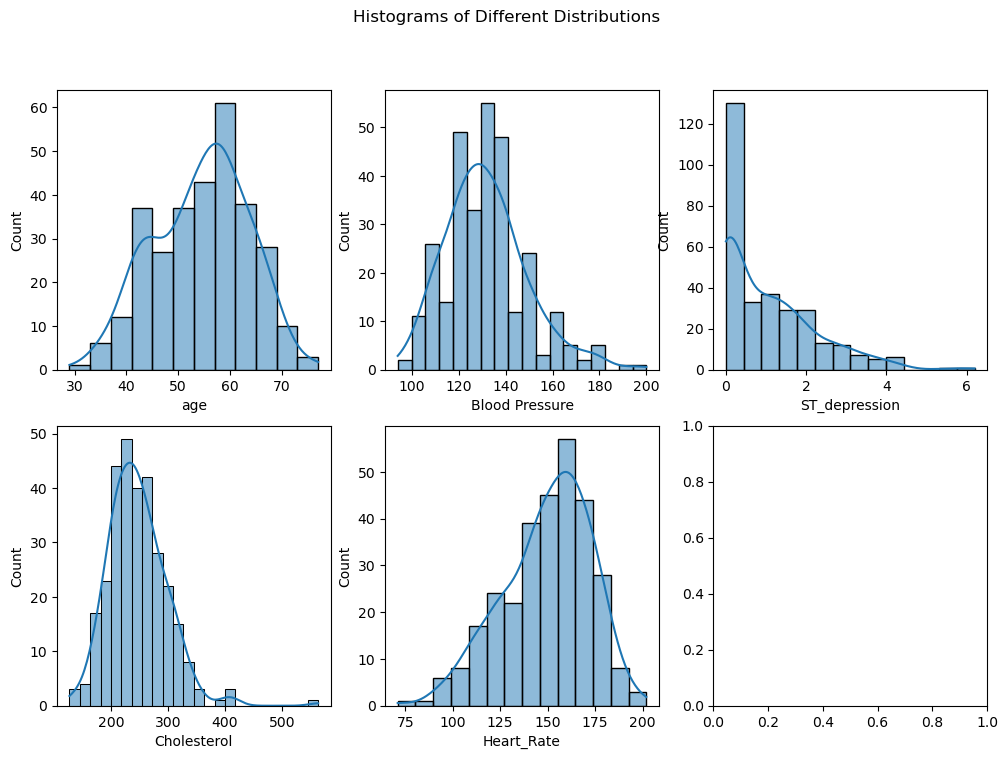

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Histograms of Different Distributions")

# Plot each histogram
sns.histplot(data=df['age'], kde=True, ax=axes[0, 0])
sns.histplot(data=df['Blood Pressure'], kde=True, ax=axes[0, 1])
sns.histplot(data=df['Cholesterol'], kde=True, ax=axes[1, 0])
sns.histplot(data=df['Heart_Rate'], kde=True, ax=axes[1, 1])
sns.histplot(data=df['ST_depression'], kde=True, ax=axes[0, 2])
plt.show()

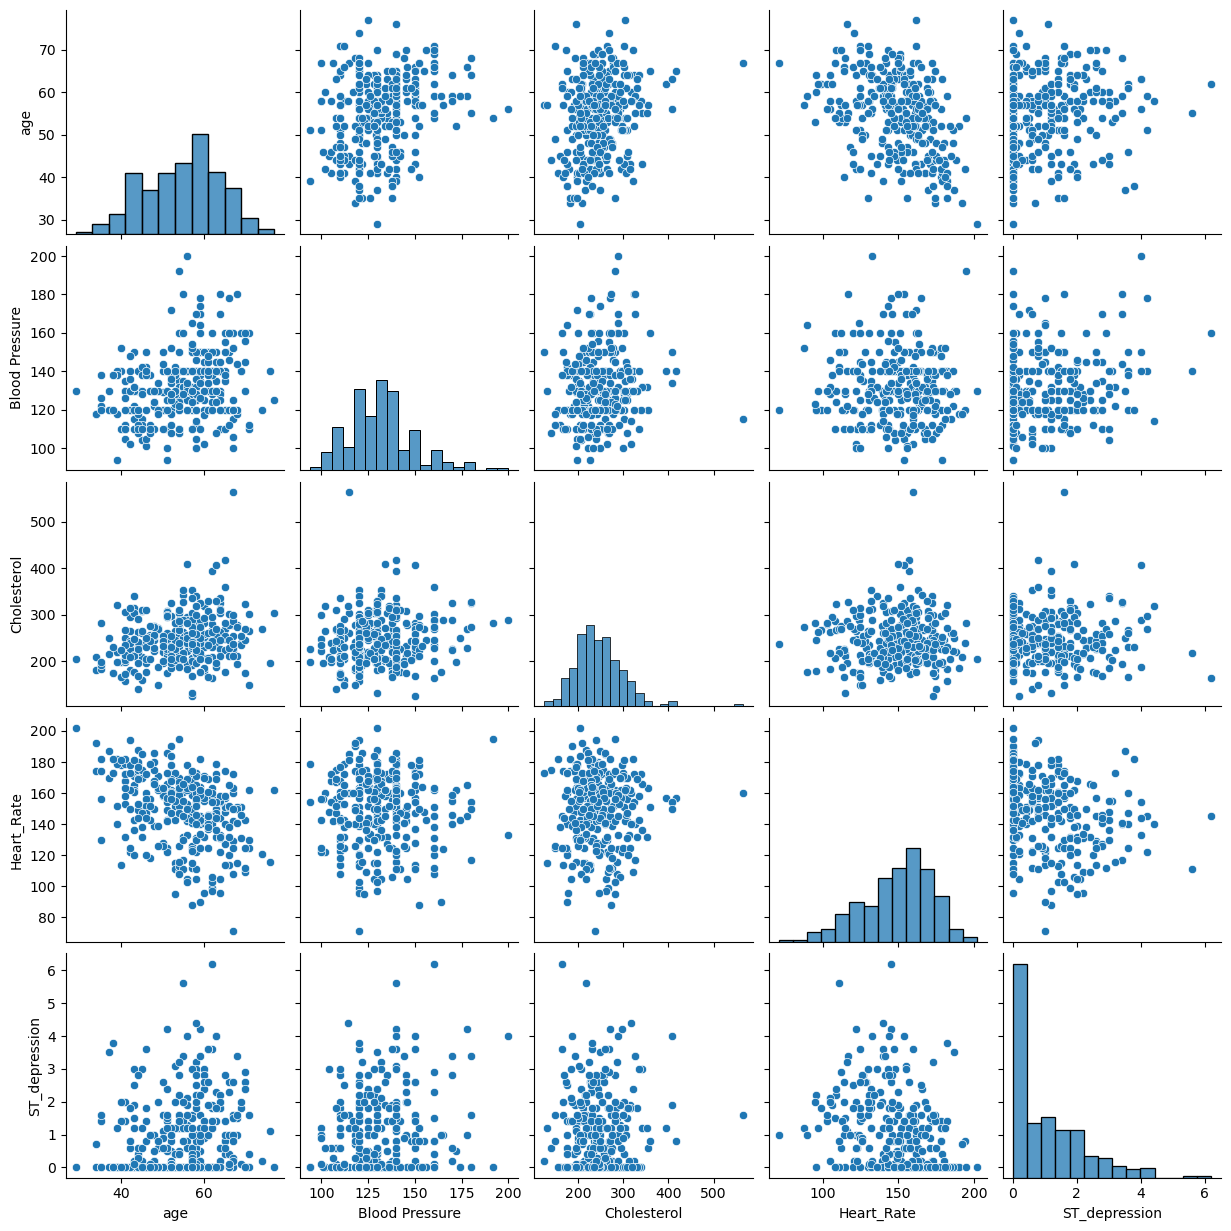

In [32]:
sns.pairplot(data=df[continous])
plt.show()

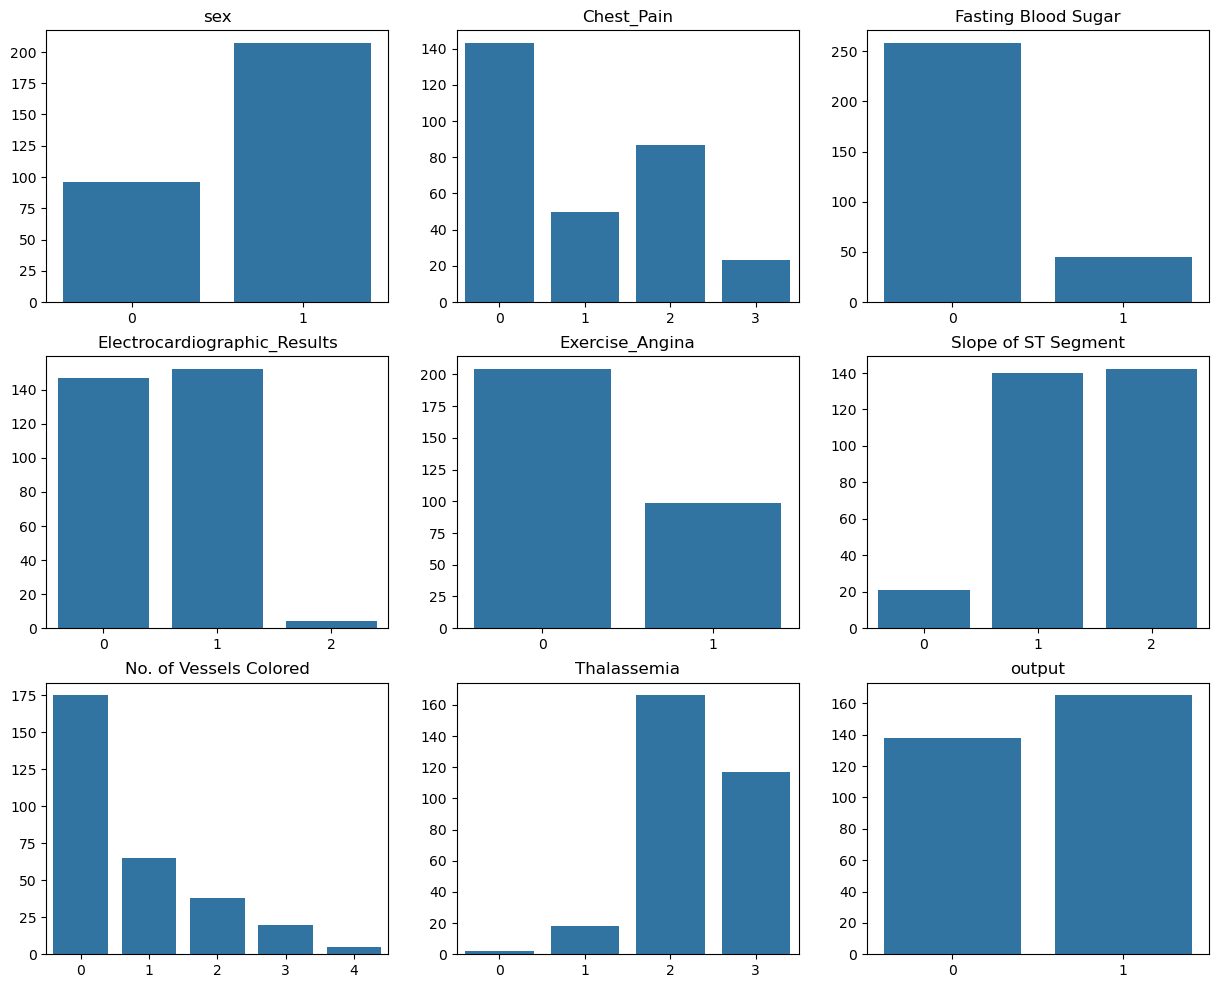

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for col, ax in zip(categorial, axes.flat):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('') 
    ax.set_ylabel('')  

plt.show()

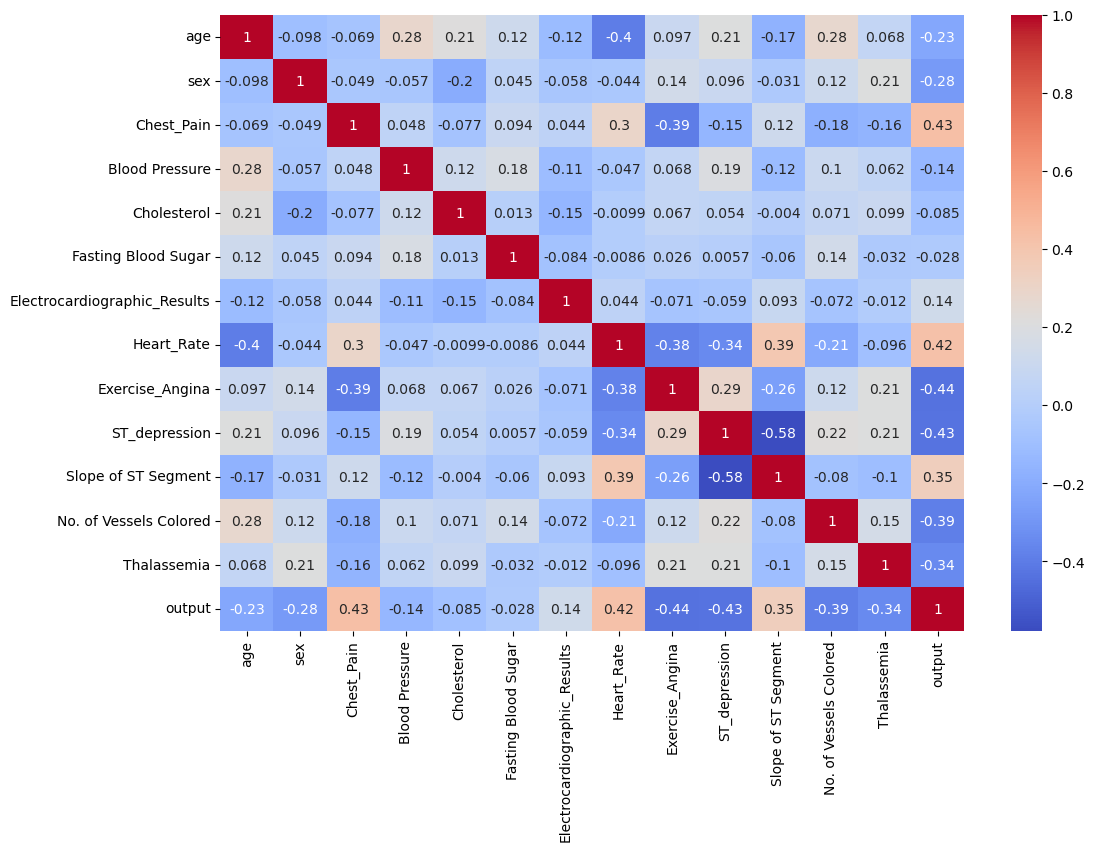

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [35]:
df.isnull().sum()

age                             0
sex                             0
Chest_Pain                      0
Blood Pressure                  0
Cholesterol                     0
Fasting Blood Sugar             0
Electrocardiographic_Results    0
Heart_Rate                      0
Exercise_Angina                 0
ST_depression                   0
Slope of ST Segment             0
No. of Vessels Colored          0
Thalassemia                     0
output                          0
dtype: int64

In [36]:
df.duplicated().sum()

1

In [37]:
df=df.drop_duplicates()

In [38]:
df.shape

(302, 14)

In [39]:
df

,age,sex,Chest_Pain,Blood Pressure,Cholesterol,Fasting Blood Sugar,Electrocardiographic_Results,Heart_Rate,Exercise_Angina,ST_depression,Slope of ST Segment,No. of Vessels Colored,Thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['age'] = sc.fit_transform(df[['age']])
df['Blood Pressure'] = sc.fit_transform(df[['Blood Pressure']])
df['Cholesterol'] = sc.fit_transform(df[['Cholesterol']])
df['Heart_Rate'] = sc.fit_transform(df[['Heart_Rate']])

In [41]:
df

,age,sex,Chest_Pain,Blood Pressure,Cholesterol,Fasting Blood Sugar,Electrocardiographic_Results,Heart_Rate,Exercise_Angina,ST_depression,Slope of ST Segment,No. of Vessels Colored,Thalassemia,output
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,2.3,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,3.5,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,1.4,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,0.8,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0,0.478910,-0.106449,0,1,-1.161988,1,0.2,1,0,3,0
299,-1.042904,1,3,-1.232023,0.338703,0,1,-0.768384,0,1.2,1,0,3,0
300,1.503322,1,0,0.707035,-1.035462,1,1,-0.374779,0,3.4,1,2,3,0
301,0.285561,1,0,-0.091401,-2.235438,0,1,-1.511859,1,1.2,1,1,3,0


In [42]:
x=df.drop(columns='output',axis=1)
y=df["output"]

# Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypred_train=lr.predict(x_train)
ypred_test=lr.predict(x_test)
from sklearn.metrics import accuracy_score
print("Train_Accuracy:",accuracy_score(y_train,ypred_train))
print("Test_Accuracy_Score:",accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print("CV_Score:",cross_val_score(lr,x_train,y_train,cv=5,scoring="accuracy").mean())

Train_Accuracy: 0.8713692946058091
Test_Accuracy_Score: 0.8032786885245902
CV_Score: 0.8426020408163264


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[21,  8],
       [ 4, 28]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7995689655172414

<Figure size 1200x800 with 0 Axes>

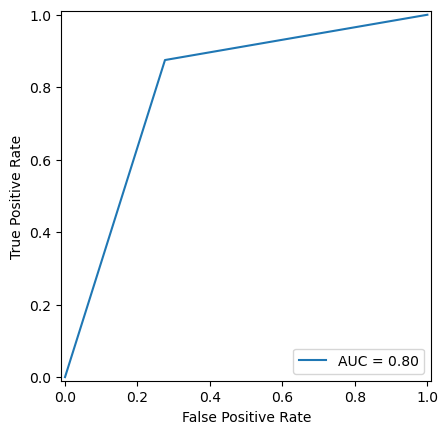

<Figure size 1200x800 with 0 Axes>

In [49]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(0,11)),'p':[1,2]}
from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
knn_grid.fit(x_train,y_train)
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

**Modeling**

In [53]:
knn_model=knn_grid.best_estimator_
knn_model.fit(x_train,y_train)
ypred_train=knn_model.predict(x_train)
ypred_test=knn_model.predict(x_test)
print("Train_Accuracy:",accuracy_score(y_train,ypred_train))
print("Test_Accuracy_Score:",accuracy_score(y_test,ypred_test))
print("CV_Score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

Train_Accuracy: 0.8672199170124482
Test_Accuracy_Score: 0.8032786885245902
CV_Score: 0.8591836734693878


# Support_Vector_Machine

In [55]:
from sklearn.svm import SVC

estimator=SVC()
param_grid={"C":[0.01,0.1,1],"kernel":['linear','rbf','sigmoid','poly']}
svm_grid=GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
svm_grid.fit(x_train,y_train)
svm_grid.best_estimator_

SVC(C=1, kernel='linear')

In [56]:
svm_model=svm_grid.best_estimator_
svm_model.fit(x_train,y_train)
ypred_train=svm_model.predict(x_train)
ypred_test=svm_model.predict(x_test)
print("Train_Accuracy:",accuracy_score(y_train,ypred_train))
print("Test_Accuracy_Score:",accuracy_score(y_test,ypred_test))
print("CV_Score:",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())

Train_Accuracy: 0.8672199170124482
Test_Accuracy_Score: 0.8360655737704918
CV_Score: 0.8467687074829933


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

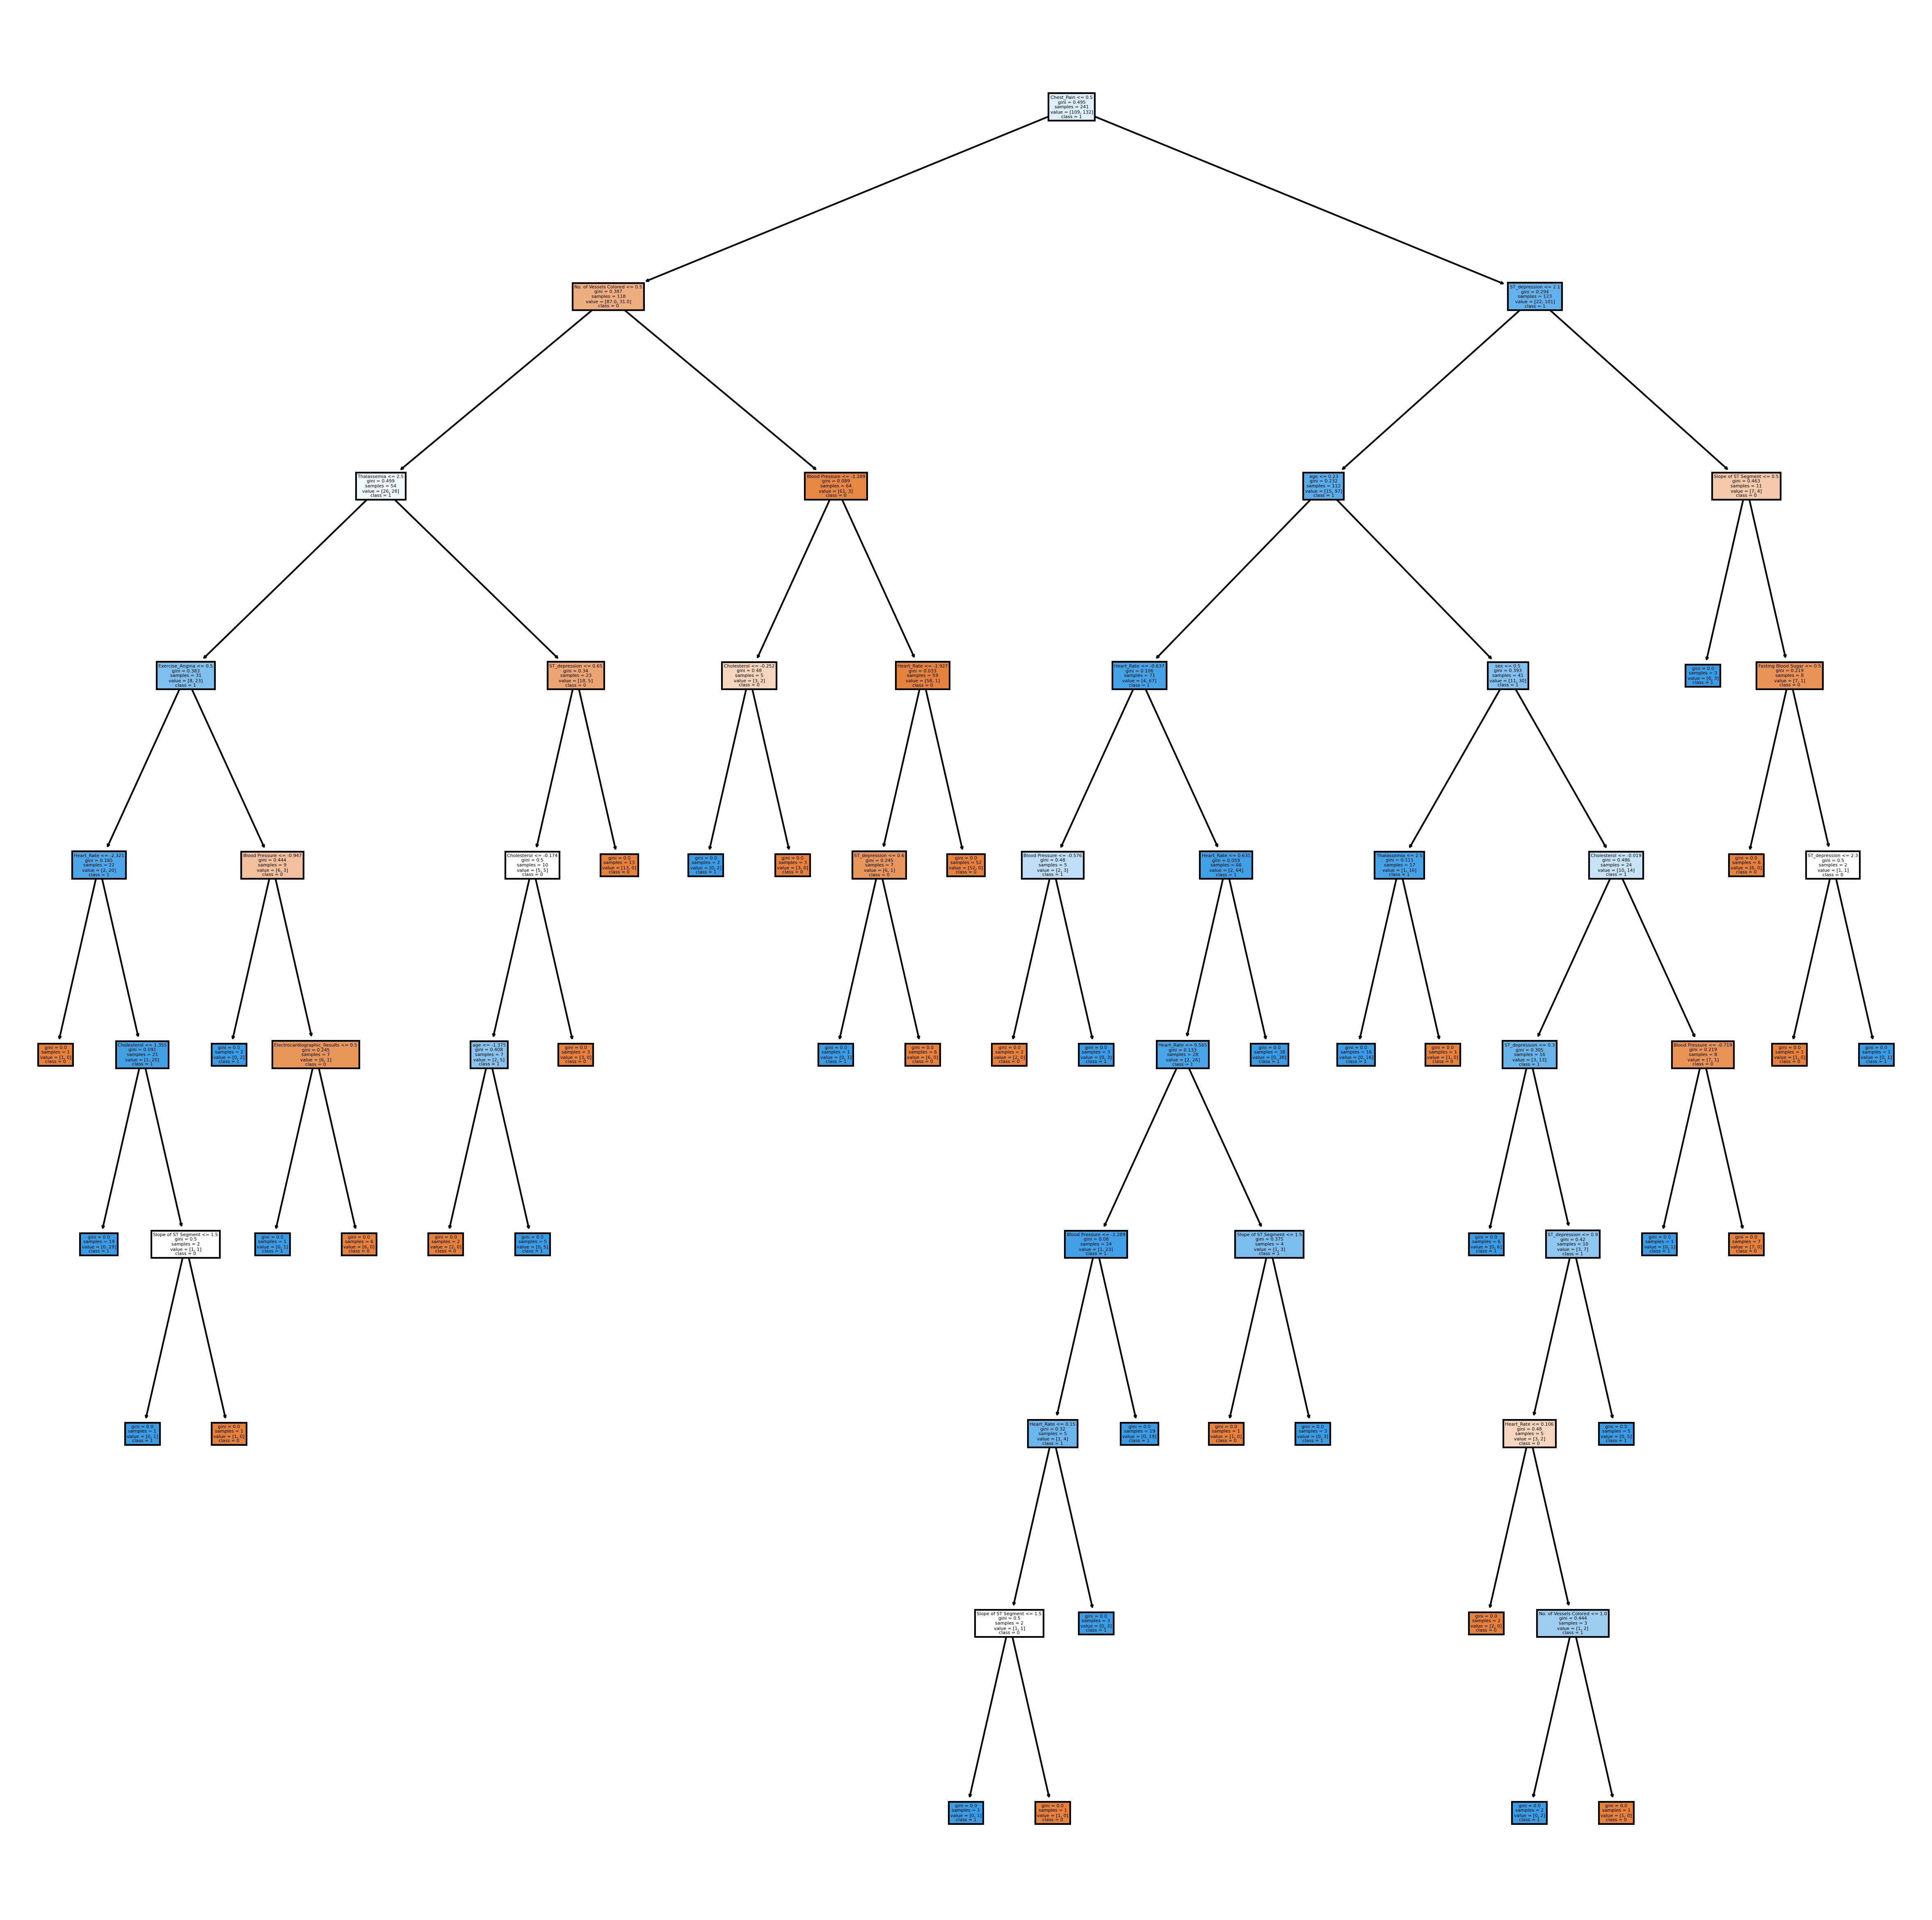

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
         feature_names= x.columns.tolist(),
         class_names=['0','1'])
plt.show()

In [60]:
estimator=DecisionTreeClassifier(random_state=True)
param_grid={"criterion":['gini','entropy'],
           "max_depth":list(range(1,9))}
dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(x_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=3, random_state=True)

In [61]:
fea=pd.DataFrame(data=dt.feature_importances_,
                  index=x.columns,
                  columns=['Importance'])
imp_features_dt=fea[fea['Importance']>0].index.tolist()
imp_features_dt

['age',
 'Chest_Pain',
 'Blood Pressure',
 'ST_depression',
 'Slope of ST Segment',
 'No. of Vessels Colored',
 'Thalassemia']

In [62]:
x_train_dt=x_train[imp_features_dt]
x_test_dt=x_test[imp_features_dt]

dt=dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)

print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.8672199170124482
Test_accuracy: 0.7704918032786885
CV_score: 0.8143169398907103


# Random_Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20))}
rf_grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
rf_grid.fit(x_train,y_train)
rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=14, random_state=True)

In [65]:
feat=pd.DataFrame(data=rf.feature_importances_,
                 index=x.columns,
                 columns=["Importance"])

imp_features=feat[feat["Importance"]>0].index.tolist()
imp_features

['age',
 'sex',
 'Chest_Pain',
 'Blood Pressure',
 'Cholesterol',
 'Fasting Blood Sugar',
 'Electrocardiographic_Results',
 'Heart_Rate',
 'Exercise_Angina',
 'ST_depression',
 'Slope of ST Segment',
 'No. of Vessels Colored',
 'Thalassemia']

In [66]:
x_train_rf=x_train[imp_features]
x_test_rf=x_test[imp_features]

rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

ypred_train=rf.predict(x_train_rf)
ypred_test=rf.predict(x_test_rf)

print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(rf,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 1.0
Test_accuracy: 0.7704918032786885
CV_score: 0.8386054421768707


# Ada_Boost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,20))}
ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(x_train,y_train)
ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=5, random_state=True)

In [69]:
fea=pd.DataFrame(data=ab.feature_importances_,
                index=x.columns,columns=["Importance"])
important_features=fea[fea["Importance"]>0].index.tolist()
important_features

['sex', 'Chest_Pain', 'ST_depression', 'No. of Vessels Colored', 'Thalassemia']

In [70]:
x_train_ab=x_train[imp_features]
x_test_ab=x_test[imp_features]

ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

ypred_train=ab.predict(x_train_ab)
ypred_test=ab.predict(x_test_ab)

print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(ab,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.8506224066390041
Test_accuracy: 0.8032786885245902
CV_score: 0.8340986394557822


# Gradient Boost

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,20)),
           "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(x_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.4, n_estimators=4, random_state=True)

In [73]:
featr=pd.DataFrame(data=gb.feature_importances_,
                index=x.columns,columns=["Importance"])
important_features=featr[featr["Importance"]>0].index.tolist()
important_features

['age',
 'sex',
 'Chest_Pain',
 'Blood Pressure',
 'Cholesterol',
 'Heart_Rate',
 'Exercise_Angina',
 'ST_depression',
 'Slope of ST Segment',
 'No. of Vessels Colored',
 'Thalassemia']

In [74]:
x_train_gb=x_train[imp_features]
x_test_gb=x_test[imp_features]


gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

ypred_train=gb.predict(x_train_gb)
ypred_test=gb.predict(x_test_gb)


print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(gb,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.8879668049792531
Test_accuracy: 0.7540983606557377
CV_score: 0.8509353741496598


# XGBoost

In [76]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[10,20,40,100],
           'max_depth':[3,4,5],
           'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(x_train,y_train)
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
feat=pd.DataFrame(data=xgb.feature_importances_,
                index=x.columns,columns=["Importance"])
important_features=feat[feat["Importance"]>0].index.tolist()
important_features

['age',
 'sex',
 'Chest_Pain',
 'Blood Pressure',
 'Cholesterol',
 'Heart_Rate',
 'Exercise_Angina',
 'ST_depression',
 'Slope of ST Segment',
 'No. of Vessels Colored',
 'Thalassemia']

In [78]:
x_train_xgb=x_train[important_features]
x_test_xgb=x_test[important_features]

xgb=xgb_grid.best_estimator_
xgb.fit(x_train_xgb,y_train)

ypred_train=xgb.predict(x_train_xgb)
ypred_test=xgb.predict(x_test_xgb)

print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,ypred_test))

print("CV_score:",cross_val_score(xgb,x_train,y_train,cv=5,scoring='accuracy').mean())

Train_accuracy: 0.9253112033195021
Test_accuracy: 0.7868852459016393
CV_score: 0.8219387755102041



# Saving Best Model


In [80]:
from joblib import dump
dump(svm_model,"Heart_disease_prediction.joblib")

['Heart_disease_prediction.joblib']

**Predection On New Data**

In [82]:
input_data={"age":56,"sex":1,"cp":1,
              "trtbps":120,"chol":236,
              "fbs":0,"restecg":1,"thalachh":178,
              "exng":0,"oldpeak":0.8,"slp":2,
              "caa":0,"thall":2}

In [83]:
data=pd.DataFrame(input_data,index=[0])
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,56,1,1,120,236,0,1,178,0,0.8,2,0,2


In [84]:
data=data.rename(columns={"cp":"Chest_Pain","trtbps":"Blood Pressure","chol":"Cholesterol","fbs":"Fasting Blood Sugar",
                   "restecg":"Electrocardiographic_Results","thalachh":"Heart_Rate",
                      "exng":"Exercise_Angina","oldpeak":"ST_depression",
                  "slp":"Slope of ST Segment","caa":"No. of Vessels Colored","thall":"Thalassemia",})

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['age'] = sc.fit_transform(data[['age']])
data['Blood Pressure'] = sc.fit_transform(data[['Blood Pressure']])
data['Cholesterol'] = sc.fit_transform(data[['Cholesterol']])
data['Heart_Rate'] = sc.fit_transform(data[['Heart_Rate']])

In [86]:
data

,age,sex,Chest_Pain,Blood Pressure,Cholesterol,Fasting Blood Sugar,Electrocardiographic_Results,Heart_Rate,Exercise_Angina,ST_depression,Slope of ST Segment,No. of Vessels Colored,Thalassemia
0,0.0,1,1,0.0,0.0,0,1,0.0,0,0.8,2,0,2


In [87]:
svm_model.predict(data)

array([1], dtype=int64)